In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sqlite3
import gensim
import numpy as np
import requests

# Table of Contents
- [Question 1](#Question-1)
- [Question 2](#Question-2)
    - [2.a](#2.a)
    - [2.b](#2.b)
        - [Step 1](#Step-1)
        - [Step 2](#Step-2)
        - [Step 3](#Step-3)
    - [2.c](#2.c)
    - [2.d](#2.d)
    - [2.e](#2.e)
    - [2.f](#2.f)
    - [2.g](#2.g)
- [Question 3](#Question-3)
- [Question 4](#Question-4)
    - [4.a](#4.a)
    - [4.b](#4.b)

# Question 1

In [2]:
def partial_sum(input_list):
    """
    This function returns an array output where output[i] is the sum of all input numbers except input[i] 
    """
    output = []
    for ii in range(len(input_list)):
        output.append(sum(input_list[:ii] + input_list[ii+1:]))
    return output

In [3]:
assert partial_sum([1,2,3,4]) == [9,8,7,6]
assert partial_sum([2,9,5,5,1]) == [20,13,17,17,21]

# Question 2

## 2.a

In [4]:
postings = pd.read_csv("job_posts.csv")

In [5]:
postings.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


## 2.b

In [6]:
jobposts = postings["jobpost"]

The jobposts seem to have the same structure for each entry. New "headers" are printed in all capital letters at the beginning of a line, followed by a colon. The steps to identify and extract the desired information are as follows:

1. Search for all fully capitalized headers at the beginning of lines. This serves to identify variants, e.g. 'TITLE' vs. 'JOB TITLE'.
2. Identify headers relevant to the information I want to extract and form groups of similar headers.
3. Extract information from job posts based on the identified headers and potential subcategories.

In [7]:
print(jobposts[0])

AMERIA Investment Consulting Company
JOB TITLE:  Chief Financial Officer
POSITION LOCATION: Yerevan, Armenia
JOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a
Chief Financial Officer. This position manages the company's fiscal and
administrative functions, provides highly responsible and technically
complex staff assistance to the Executive Director. The work performed
requires a high level of technical proficiency in financial management
and investment management, as well as management, supervisory, and
administrative skills.
JOB RESPONSIBILITIES:  
- Supervises financial management and administrative staff, including
assigning responsibilities, reviewing employees' work processes and
products, counseling employees, giving performance evaluations, and
recommending disciplinary action;
- Serves as member of management team participating in both strategic
and operational planning for the company;
- Directs and oversees the company's financial management activities,
in

### Step 1

In [8]:
# Extract all capitalized headers in the job postings that start on a new line
all_headers = [re.findall(pattern="\n([A-Z /]+):", string=entry) for entry in jobposts]

In [9]:
# Look at all unique headers
all_headers_set = set([item for sublist in all_headers for item in sublist])
for header in sorted(all_headers_set):
    print(header)

ABOUT
ABOUT CHAMPIONSHIP
ABOUT COMPANY
ABOUT PROGRAM
ABOUT PROGRAM/ PROJECT
ABOUT PROJECT
ABOUT THE SPEAKER
ADDITIONAL CHARACTERISTICS
ADDITIONAL COMPETENCIES
ADDITIONAL DESIRED CHARACTERISTICS
ADDITIONAL NOTES
ADDITIONAL RESPONSIBILITIES
ADDITIONAL SELECTION CRITEREA
ADDITIONAL SELECTION CRITERIA
ADMINISTRATIVE DUTIES
AEFM
ANNOUNCEMENT CODE
ANNOUNCEMENT NUMBER
APPLICATION DEADLINE
APPLICATION PROCEDURES
ATTACHMENTS
AUTHOR
BACKGROUND
BASIC FUNCTION OF THE POSITION
COMMUNICATIONS
COMPETENCIES
CONTACT INFORMATION
CORPORATE COMPETENCIES
COURSE OVERVIEW
CRITERIA
DATE/ TIME
DEFINITION
DEFINITIONS
DESCRIPTION
DESIRABLE COMPETENCIES
DESIRABLE EXPERIENCE
DESIRABLE QUALIFICATIONS
DESIRED QUALIFICATION
DESIRED QUALIFICATIONS
DESIRED SKILLS
DESIRED SKILLS AND KNOWLEDGE
DETAIL DESCRIPTION
DISTINGUISHING FEATURES
DNS
DOMAIN KNOWLEDGE
DURATION
EDUCATION TYPE
EDUCATION/ EXPERIENCE
EDUCATIONAL LEVEL
EFM/MOH/NOR
ELIGIBILITY
ENROLLMENT
ESSENTIAL SPECIALIZED SKILLS/ KNOWLEDGE/ COMPETENCIES
EU CONTRACT NU

I can ensure that my approach is suitable by showing that most of the job postings are in the format I expect. The following barplot shows the number of headers per job posting. The vast majority of job postings adhere to this format, i.e. capitalized headers at the beginning of lines, followed by a colon.

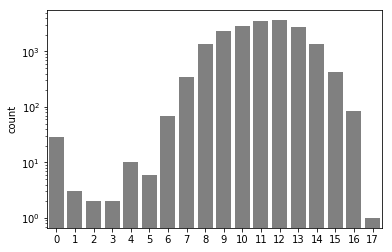

In [10]:
sns.countplot([len(x) for x in all_headers], color="grey")
plt.yscale("log")

In [11]:
print("{:.2f}% of job postings have at least 5 headers as defined above.".format(
    sum([len(x) > 5 for x in all_headers]) * 100 / len(all_headers)))

99.73% of job postings have at least 5 headers as defined above.


### Step 2
The next step requires some manual work to find symonyms for the information I'm interested in extracting from the jobposts column. The following dictionary summarizes synonyms I've identified based on the list above.

In [12]:
synonyms = {
    "job_title": ["JOB TITLE", "TITLE"],
    "position_duration": ["POSITION DURATION", "DURATION"],
    "position_location": ["POSITION LOCATION", "LOCATION"],
    "job_description": [
        "JOB DESCRIPTION", "NKRJOB DESCRIPTION", "DESCRIPTION", "MMT PROJECT DESCRIPTION", 
        "DETAIL DESCRIPTION", "PROJECT DESCRIPTION"],
    "job_responsibilities": ["RESPONSIBILITIES", "JOB RESPONSIBILITIES"],
    "required_qualifications": ["REQUIRED QUALIFICATIONS", "REQUIREMENTS"], 
    "remuneration": ["REMUNERATION/ SALARY", "REMUNERATION", "SALARY"],
    "application_deadline": ["APPLICATION DEADLINE"],
    "about_company": ["ABOUT COMPANY", "ABOUT"]}

For the most part, these synonyms are mutually exclusive in job postings and therefor post no issue regarding overlaps. The exception are the job_description and the about_company fields. In these cases, the order of possible headers indicates their priority, e.g. if a job posting has both a "JOB DESCRIPTION" and a "DETAIL DESCRIPTION" field then the latter is ignored. However, if it only has a "DETAIL DESCRIPTION" field then it is interpreted as the job description.

A special note on required qualifications: Many job postings have additional categories, such as "PREFERRED QUALIFICATIONS", or "DESIRABLE COMPETENCIES". Whether or not to include these in the required qualifications information is debatable. To avoid this issue, both here and when extracting information, I will be strict with this category. That means any header that implies "additional requirements" will be treated as an independent category. An entirely separate project could be dedicated to identifying and prioritizing requirements based on the category headers.

In [13]:
for key in synonyms.keys():
    num_overlaps = len([
        headers for headers in all_headers if 
        len(set(synonyms[key]).intersection(set(headers))) > 1])
    if num_overlaps == 0:
        print("No overlaps for {}".format(key))
    else:
        print("{} overlaps for {}".format(num_overlaps, key))

No overlaps for job_title
No overlaps for position_duration
No overlaps for position_location
3 overlaps for job_description
No overlaps for job_responsibilities
No overlaps for required_qualifications
No overlaps for remuneration
No overlaps for application_deadline
535 overlaps for about_company


### Step 3
Splitting each job posting is a matter of extracting text between the header of interest, or synonyms thereof, and the next header. This is a problem, however, as job postings may include "subcategories", e.g. they may group job requirements into different skill groups that I still want to all extract. To solve this problem, I identify all potential subsequent headers for each header of interest and remove those that indicate a subcategory.

Subsequent means headers that are between two of the primary fields of interest defined above in `synonyms`.

The following dictionary describes the potential "end-points" of each category of interest. E.g. When extracting job description information, the program needs to know how to react when it reaches one of the headers detailed below. Does it include it in the job description or does it end the mining and assume it has extracted the complete job description?

In [14]:
def get_synonym_index(to_check, to_find):
    """
    A generic function that identifies if the list 'to_check' contains at least one of the 
    values in 'to_find'. It returns the index of the first value found
    
    :param to_check: An iterable
    :param synonyms: An iterable
    """
    
    for possible_header in to_find:
        if possible_header in to_check:
            return to_check.index(possible_header)        
    return None

In [15]:
subsequent_headers = {key: set() for key in synonyms.keys()}
for key in synonyms.keys():
    for headers in all_headers:
        synonym_index = get_synonym_index(headers, synonyms[key])
        if synonym_index is None:
            continue
        
        if synonym_index == len(headers)-1:
            continue
        
        for h in headers[synonym_index+1:]:
            if h in [item for sublist in synonyms.values() for item in sublist]:
                break
            subsequent_headers[key].add(h)

In [16]:
subsequent_headers

{'job_title': {'ANNOUNCEMENT CODE',
  'APPLICATION PROCEDURES',
  'AUTHOR',
  'DATE/ TIME',
  'EDUCATION TYPE',
  'ELIGIBILITY',
  'EVENT TYPE',
  'FELLOWSHIP TYPE',
  'FUNCTIONAL TITLE',
  'INTENDED AUDIENCE',
  'LANGUAGE',
  'NEWS TYPE',
  'NOMINATION GUIDELINES',
  'NOTE',
  'OPEN TO',
  'OPEN TO/ ELIGIBILITY CRITERIA',
  'PAGES',
  'PROJECT DURATION',
  'PROJECT LOCATION',
  'PUBLICATION DATE',
  'PUBLICATION TYPE',
  'PURPOSE OF THE AWARD',
  'REFERENCE CODE',
  'REPORTS TO',
  'SCHOLARSHIP TYPE',
  'SPECIFY JOB CODE',
  'START DATE/ TIME',
  'TERM',
  'THE FOLLOWING BENEFITS',
  'WORK HOURS'},
 'position_duration': set(),
 'position_location': {'ADDITIONAL NOTES',
  'APPLICATION PROCEDURES',
  'ATTACHMENTS',
  'AUTHOR',
  'ENROLLMENT',
  'NEWS DETAILS',
  'WORK HOURS'},
 'job_description': {'ABOUT THE SPEAKER',
  'APPLICATION PROCEDURES',
  'BASIC FUNCTION OF THE POSITION',
  'DEFINITION',
  'DISTINGUISHING FEATURES',
  'EDUCATIONAL LEVEL',
  'FAX',
  'FEE',
  'GRADE LEVEL',
  'I

The goal now is to identify which of these headers are separate categories and which are subcategories of our fields of interest. First, a subcategory header must always appear in the same place, ergo if a header is present multiple times in the dictionary above, it cannot be a subcategory.

In [17]:
all_subsequent_headers = [item for sublist in subsequent_headers.values() for item in sublist]
duplicate_subsequent_headers = set([
    header for header in set(all_subsequent_headers) 
    if all_subsequent_headers.count(header) > 1])
for key in subsequent_headers.keys():
    subsequent_headers[key].difference_update(duplicate_subsequent_headers)

In [18]:
subsequent_headers

{'job_title': {'ANNOUNCEMENT CODE',
  'DATE/ TIME',
  'EDUCATION TYPE',
  'ELIGIBILITY',
  'EVENT TYPE',
  'FELLOWSHIP TYPE',
  'FUNCTIONAL TITLE',
  'INTENDED AUDIENCE',
  'LANGUAGE',
  'NEWS TYPE',
  'NOMINATION GUIDELINES',
  'OPEN TO',
  'OPEN TO/ ELIGIBILITY CRITERIA',
  'PAGES',
  'PROJECT DURATION',
  'PROJECT LOCATION',
  'PUBLICATION DATE',
  'PUBLICATION TYPE',
  'PURPOSE OF THE AWARD',
  'REFERENCE CODE',
  'SCHOLARSHIP TYPE',
  'SPECIFY JOB CODE',
  'START DATE/ TIME',
  'TERM',
  'THE FOLLOWING BENEFITS'},
 'position_duration': set(),
 'position_location': {'ENROLLMENT', 'NEWS DETAILS'},
 'job_description': {'ABOUT THE SPEAKER',
  'BASIC FUNCTION OF THE POSITION',
  'DEFINITION',
  'DISTINGUISHING FEATURES',
  'EDUCATIONAL LEVEL',
  'FEE',
  'GRADE LEVEL',
  'INSTRUCTOR',
  'INSTRUCTORS',
  'METHODOLOGY',
  'PANELISTS',
  'PARTICIPATION FEE',
  'SCHEDULE',
  'SECTIONS',
  'SPECIAL COURSES',
  'SUPERVISES',
  'SYLLABUS OUTLINE',
  'TRAINERS',
  'WORKSHOP LEADERS'},
 'job_re

Manually parsing the above dictionary leads to the following subcategory headers:

In [19]:
subcategories = {key: [] for key in synonyms.keys()}
subcategories["job_description"] = ["BASIC FUNCTION OF THE POSITION"]
subcategories["job_responsibilities"] = [
    "ADDITIONAL RESPONSIBILITIES", "ADMINISTRATIVE DUTIES", 
    "GIK", "IP", "IT", "MEAL", "MEL", "OCCASIONAL SIGNIFICANT DUTIES", 
    "OTHER RESPONSIBILITIES", "SPECIFIC JOB REQUIREMENTS"],
subcategories["required_qualifications"] = [
    "COMMUNICATIONS", "CORPORATE COMPETENCIES", "DNS", "DOMAIN KNOWLEDGE",
    "EDUCATION/ EXPERIENCE", "ESSENTIAL SPECIALIZED SKILLS/ KNOWLEDGE/ COMPETENCIES", 
    "FTP", "FUNCTIONAL COMPETENCIES", "KEY COMPETENCIES", "OTHER SKILLS", 
    "PROFESSIONAL SKILLS", "SKILLS", "SKILLS/KNOWLEDGE", "SPECIAL REQUIREMENTS", 
    "SSH", "WORK EXPERIENCE", "XML"],
subcategories["about_company"] = ["RA", "UNDP", "USA"]

Lastly, I loop through each job post to extract the text corresponding to each header, making sure to ignore the subcategory headers identified above. I extract the specific headers now and avoid the restriction that a header must be at the beginning of a line.

In [20]:
jobposts_parsed = []
for index, jobpost in enumerate(jobposts):
    jobpost_parsed = {key: None for key in synonyms.keys()}
    headers = all_headers[index]
    for key in synonyms.keys():
        header_index = get_synonym_index(headers, synonyms[key])
        if header_index is None:
            continue
        header = headers[header_index]
        start_position = re.search(string=jobpost, pattern=header+":").end()
        # Go through the remaining headers until we reach one that isn't a permitted 
        # subcategory. This header marks the end of the current category.
        next_category = [h for h in headers[header_index+1:] if h not in subcategories[key]]
        end_position = re.search(string=jobpost, pattern=next_category[0]).start() if len(next_category) > 0 else len(jobpost)
        jobpost_parsed[key] = jobpost[start_position:end_position].strip()
    jobposts_parsed.append(jobpost_parsed)
jobposts_parsed = pd.DataFrame(jobposts_parsed)

In [21]:
jobposts_parsed.head()

,about_company,application_deadline,job_description,job_responsibilities,job_title,position_duration,position_location,remuneration,required_qualifications
0,None,26 January 2004\r\n---------------------------...,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,Chief Financial Officer,None,"Yerevan, Armenia",None,"To perform this job successfully, an\r\nindivi..."
1,The International Research & Exchanges Board (...,12 January 2004,IREX currently seeks to fill the position of a...,- Presenting the CC program to interested part...,Full-time Community Connections Intern (paid i...,3 months,"IREX Armenia Main Office; Yerevan, Armenia",Commensurate with experience.,- Bachelor's Degree; Master's is preferred;\r\...
2,The Caucasus Environmental NGO Network is a\r\...,20 January 2004,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,Country Coordinator,Renewable annual contract,"Yerevan, Armenia",Salary commensurate with experience.,"- Degree in environmentally related field, or ..."
3,None,23 January 2004,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,BCC Specialist,None,"Manila, Philippines",None,"- Advanced degree in public health, social sci..."
4,None,"20 January 2004, 18:00\r\n--------------------...",None,- Rendering technical assistance to Database M...,Software Developer,None,"Yerevan, Armenia",Will be commensurate with the norms accepted i...,- University degree; economical background is ...


## 2.c

Most entries are in the same format, e.g. Jan 01, 2015. Some, however, are in a different format. In particular, the year is missing in these entries.

In [22]:
print("There are {} entries in an incompatible format".format(
    sum([re.match(pattern="[A-Z][a-z]{2} [0-9]{1,2}, 20[0-9]{2}", string=date) 
         is None for date in postings["date"]])))

There are 2297 entries in an incompatible format


In [23]:
# "Good" example
postings["date"][0]

'Jan 5, 2004'

In [24]:
# "Bad" example
postings["date"][311]

'Jun 1 10:13 PM'

To solve this issue, I look through the previously parsed raw job posts at the application deadlines and use the year of the deadline as the estimated year of publication. It stands to reason that the deadline will be in the same year as the publishing of the job advert.

Note: the Kaggle website states that the data ranges from 2004 to 2015, so I assume that "the last two years", refers to 2014 to 2015 (I'm assuming 2016 just started).

In [25]:
jobposts_parsed["application_deadline"][index]

'20 January 2016'

In [26]:
estimated_year = []
for index, posting in postings.iterrows():
    match = re.search(pattern="(20[0-1][0-9])", string=posting["date"])
    if match is not None:
        estimated_year.append(match.groups()[0])
    else:
        try:
            match = re.search(
                pattern="(20[0-1][0-9])", 
                string=jobposts_parsed["application_deadline"][index])
            estimated_year.append(match.groups()[0])
        except (TypeError, AttributeError):
            estimated_year.append(None)

Use only job adverts from the last two years and extract the most frequent company.

In [27]:
postings.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [28]:
most_freq_company = postings.loc[pd.Series(estimated_year).isin(
    ["2014", "2015"]), "Company"].value_counts().index[0]
print("The most frequent company to post job adverts in 2014 and 2015 was '{}'".format(most_freq_company))

The most frequent company to post job adverts in 2014 and 2015 was 'Mentor Graphics Development Services CJSC'


## 2.d

The approach is similar to 2.c, except that every entry has month information

In [29]:
month_matchstring = "((?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*)"
print("There are {} entries without a month".format(
    sum([re.search(pattern=month_matchstring, string=date) is None for date in postings["date"]])))

There are 0 entries without a month


In [30]:
pub_months = [re.search(pattern=month_matchstring, string=date).groups()[0] for date in postings["date"]]
pub_freq_by_month = [(key, pub_months.count(key)) for key in set(pub_months)]

In [31]:
sorted(pub_freq_by_month, key=lambda x: x[1], reverse=True)

[('Mar', 1702),
 ('Feb', 1665),
 ('Jun', 1662),
 ('Sep', 1652),
 ('Oct', 1637),
 ('Aug', 1613),
 ('Jul', 1595),
 ('May', 1580),
 ('Nov', 1573),
 ('Apr', 1466),
 ('Dec', 1432),
 ('Jan', 1424)]

In [32]:
print("The month with the most job is '{}'.".format(
    sorted(pub_freq_by_month, key=lambda x: x[1], reverse=True)[0][0]))

The month with the most job is 'Mar'.


## 2.e

Because the job responsibilities are in bullet-point format with occasional headers and free text, separating them into sentences becomes an arduous task. Instead, I will simply split them into words and remove all punctuation.

In [33]:
def preprocess_jobposts(input_string):
    """
    The input pipeline consists of the following steps:
        - Replace various whitespace and escape characters with spaces
        - Remove all non-alphanumeric characters (keep spaces)
        - Convert all letters to lower case
        - Tokenize words
        - Remove stop words
        - Stem words
    """
    if input_string is None:
        return ""
    output = re.sub(pattern="\s", repl=" ", string=input_string).strip()
    output = re.sub(pattern="[^A-Za-z0-9 ]", repl="", string=output).strip()
    output = output.lower()
    output = nltk.word_tokenize(output)
    # We have to remove punctuation from stop words since we've already done so with the main text
    stop_words = nltk.corpus.stopwords.words("english")
    stop_words = [re.sub(pattern="[^A-Za-z0-9 ]", repl="", string=word).strip() for word in stop_words]
    output = [word for word in output if word not in stop_words]
    # Since we're only interested in converting plurals to singular we can make like simple for us
    # and lemmatize each word as if it were a noun
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in output])

In [34]:
jobposts_parsed["job_responsibilities"] = jobposts_parsed["job_responsibilities"].apply(preprocess_jobposts)

I will also apply this to the job requirements as well as the description

In [35]:
jobposts_parsed["required_qualifications"] = jobposts_parsed["required_qualifications"].apply(preprocess_jobposts)
jobposts_parsed["job_description"] = jobposts_parsed["job_description"].apply(preprocess_jobposts)

## 2.f

In [36]:
jobposts_parsed["position_duration"] = jobposts_parsed["position_duration"].fillna("Undetermined")

## 2.g

Merge the existing columns with the new information obtained from the jobposts columns (I will prefer the information mined from the jobposts column over existing columns when thet exist in both data frames).

In [37]:
postings.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [38]:
jobposts_parsed.columns

Index(['about_company', 'application_deadline', 'job_description',
       'job_responsibilities', 'job_title', 'position_duration',
       'position_location', 'remuneration', 'required_qualifications'],
      dtype='object')

In [39]:
postings_full = pd.concat((
    postings[["jobpost", "date", "Company", "AnnouncementCode", "Term", 
              "Eligibility", "Audience", "StartDate", "ApplicationP", 
              "OpeningDate", "Notes", "Attach"]], jobposts_parsed), 
    axis=1)

In [40]:
postings_full.head()

,jobpost,date,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,ApplicationP,OpeningDate,...,Attach,about_company,application_deadline,job_description,job_responsibilities,job_title,position_duration,position_location,remuneration,required_qualifications
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,"To apply for this position, please submit a\r\...",NaN,...,NaN,None,26 January 2004\r\n---------------------------...,ameria investment consulting company seeking c...,supervises financial management administrative...,Chief Financial Officer,Undetermined,"Yerevan, Armenia",None,perform job successfully individual must able ...
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,Please submit a cover letter and resume to:\r\...,NaN,...,NaN,The International Research & Exchanges Board (...,12 January 2004,irex currently seek fill position paid intern ...,presenting cc program interested party assisti...,Full-time Community Connections Intern (paid i...,3 months,"IREX Armenia Main Office; Yerevan, Armenia",Commensurate with experience.,bachelor degree master preferred excellent ski...
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Please send resume or CV toursula.kazarian@......,NaN,...,NaN,The Caucasus Environmental NGO Network is a\r\...,20 January 2004,public outreach strengthening growing network ...,working country director provide environmental...,Country Coordinator,Renewable annual contract,"Yerevan, Armenia",Salary commensurate with experience.,degree environmentally related field 5 year re...
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",Manoff Group,NaN,NaN,NaN,NaN,NaN,Please send cover letter and resume to Amy\r\n...,NaN,...,NaN,None,23 January 2004,lead local enhancement development health bcc ...,identify gap knowledge overseeing information ...,BCC Specialist,Undetermined,"Manila, Philippines",None,advanced degree public health social science c...
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,Successful candidates should submit\r\n- CV; \...,NaN,...,NaN,None,"20 January 2004, 18:00\r\n--------------------...",,rendering technical assistance database manage...,Software Developer,Undetermined,"Yerevan, Armenia",Will be commensurate with the norms accepted i...,university degree economical background plus e...


In [41]:
con = sqlite3.connect("jobposts.sqlite3")
postings_full.to_sql("jobposts", con)
con.close()

# Question 3

I utilize the job responsibilities column converted above to identify semantically similar jobs. I use Word2Vec embeddings pretrained on Google's news article database (see [this link](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)) to extract word scores. A job post's score is defined as the mean of score vectors of all words. You can download the [model](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing), but be warned that it is a 1.5 GB archive!

In [42]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

In [43]:
def get_post_score(text, model):
    try:
        tokens = nltk.word_tokenize(text)
        return np.mean([model.get_vector(token) for token in tokens 
                        if token in model.vocab.keys()], 
                       axis=0)
    except TypeError:
        return None

In [44]:
job_scores = postings_full["job_responsibilities"].apply(get_post_score, model=model)

/home/jan/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [45]:
job_scores.head(10)

0    [-0.082119934, 0.012898763, 0.0039139614, -0.0...
1    [0.009970838, 0.03340045, 0.023339879, -0.0071...
2    [-0.052274432, -0.015332031, -0.0060650418, -0...
3    [-0.08895455, 0.0028847214, 0.01352956, 0.0158...
4    [0.0065231323, -0.03805203, -0.030592177, 0.05...
5                                                  NaN
6                                                  NaN
7                                                  NaN
8    [-0.04382381, -0.0045410437, 0.004175257, -0.0...
9                                                  NaN
Name: job_responsibilities, dtype: object

In [46]:
num_valid_postings = len(job_scores) - job_scores.isna().sum()
print("There are {} job postings with valid score vectors.".format(num_valid_postings))
print("This is equivalent to {:.0f} distance computations.".format(
    (num_valid_postings**2-num_valid_postings)/2))

There are 16471 job postings with valid score vectors.
This is equivalent to 135638685 distance computations.


Computing a similarity matrix and identifying groups is completely unfeasible.

The example below shows that my approach, averaging the word embeddings, does identify similar sentences.

In [47]:
import sklearn.metrics.pairwise
a = get_post_score("The quick brown fox", model)
b = get_post_score("The fox was brown and quick", model)
c = get_post_score("Computer networks are vast", model)
sklearn.metrics.pairwise.cosine_similarity([a, b, c])

array([[1.0000002 , 0.9508674 , 0.12271819],
       [0.9508674 , 0.99999994, 0.15431881],
       [0.12271819, 0.15431881, 1.        ]], dtype=float32)

# Question 4

## 4.a

In [48]:
raw_text = requests.get("https://en.wikipedia.org/wiki/1990s_in_music").text

## 4.b

In [49]:
best_selling_artists = pd.read_html("https://en.wikipedia.org/wiki/List_of_best-selling_music_artists")

The first 6 tables are of best-selling artists.

In [50]:
for entry in best_selling_artists:
    print(entry.columns)

Index(['Artist', 'Country / Market', 'Period active',
       'Release year of first charted record', 'Genre',
       'Total certified units(from available markets)[a]', 'Claimed sales'],
      dtype='object')
Index(['Artist', 'Country / Market', 'Period active',
       'Release-year of first charted record', 'Genre',
       'Total certified units(from available markets)[a]', 'Claimed sales'],
      dtype='object')
Index(['Artist', 'Country / Market', 'Period active',
       'Release-year of first charted record', 'Genre',
       'Total certified units(from available markets)[a]', 'Claimed sales'],
      dtype='object')
Index(['Artist', 'Country / Market', 'Period active',
       'Release-year of first charted record', 'Genre',
       'Total certified units(from available markets)[a]', 'Claimed sales'],
      dtype='object')
Index(['Artist', 'Country / Market', 'Period active',
       'Release-year of first charted record', 'Genre',
       'Total certified units(from available markets)[

In [51]:
best_selling_artist_names = set([
    artist for entry in best_selling_artists[0:6]
    for artist in entry["Artist"]])

In [52]:
best_selling_artists_90s = [
    artist for artist in best_selling_artist_names 
    if re.search(artist, raw_text) is not None]

In [53]:
print("Of the {} best selling artists listed on Wikipedia, {} are from the 1990s".format(
    len(best_selling_artist_names), len(best_selling_artists_90s)))

Of the 116 best selling artists listed on Wikipedia, 44 are from the 1990s
